# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter



# 1.1 Reading data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')


In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
project_data.project_is_approved.value_counts()


Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


1    92706
0    16542
Name: project_is_approved, dtype: int64

In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 preprocessing of project_subject_categories

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


# 1.3 preprocessing of project_subject_subcategories

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

# 1.4 preprocessing of project grade categories

In [7]:
#preprocess project grade category
print(project_data['project_grade_category'].values[0])
print("="*50)
print(project_data['project_grade_category'].values[150])
print("="*50)
print(project_data['project_grade_category'].values[1000])
print("="*50)
print(project_data['project_grade_category'].values[20000])
print("="*50)


project_data['project_grade_category'].value_counts()

Grades PreK-2
Grades 3-5
Grades 3-5
Grades PreK-2


Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [8]:
preprocessed_project_grade_categories= []

for grade_cat in tqdm(project_data["project_grade_category"]):
   
    grade_cat = grade_cat.replace('-', '_')  #Replacing(-) with(_)
    grade_cat = grade_cat.replace('Grades', '') #Removing grades as it is redundant
   
    grad_cat = ' '.join(f for f in grade_cat.split())
    preprocessed_project_grade_categories.append(grad_cat.strip())

100%|██████████████████████████████| 109248/109248 [00:00<00:00, 109669.26it/s]


In [9]:
print(preprocessed_project_grade_categories[1])
print("="*50)
print(preprocessed_project_grade_categories[50])
print("="*50)
print(preprocessed_project_grade_categories[500])
print("="*50)
print(preprocessed_project_grade_categories[5000])
print("="*50)
print(preprocessed_project_grade_categories[10001])

6_8
PreK_2
9_12
PreK_2
PreK_2


# 1.5 preprocessing of teacher prefix

In [10]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [11]:
def replace_cate(lst):          # Removing (.) in Mrs. 
    return lst.replace('.','')
   

project_data['teacher_prefix']= project_data['teacher_prefix'].astype(str).apply(replace_cate)

In [12]:
preprocessed_teacher_prefix = []

for teach_prefix in tqdm(project_data["teacher_prefix"]):
    
    preprocessed_teacher_prefix.append(teach_prefix.strip())

100%|██████████████████████████████| 109248/109248 [00:00<00:00, 335908.61it/s]


In [13]:
print(preprocessed_teacher_prefix[1])
print("="*50)
print(preprocessed_teacher_prefix[50])
print("="*50)
project_data.teacher_prefix.value_counts()

Mr
Mrs


Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
null           3
Name: teacher_prefix, dtype: int64

 # clean titles preprocessing

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
title = decontracted(project_data['project_title'].values[2000])


In [17]:
# stopwords removed first then decontracted function is used

In [18]:
clean_titles = []

for titles in tqdm(project_data["project_title"]):
    title = ' '.join(f for f in title.split() if f not in stopwords)
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    
    clean_titles.append(title.lower().strip())

100%|████████████████████████████████| 109248/109248 [00:13<00:00, 7867.72it/s]


In [19]:
project_data["clean_titles"] = clean_titles

In [20]:
project_data.drop(['project_title'], axis=1, inplace=True)

# Adding a new feature Number of words in title

In [21]:
title_word_count = []

In [22]:
for a in project_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)

In [23]:
project_data["title_word_count"] = title_word_count

In [24]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             Ms   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60            Mrs   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec            Mrs   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                        clean_titles  title_word_count  
0   educational support for english learners at home                 7  
1               wanted projector for hungry learners                 5  
2  soccer equipment for awesome middle school stu...                 7  
3                             techie kindergarteners                 2  
4                             interactive math tools                 3

# combining 4 essays into 1

In [25]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [26]:
ess = decontracted(project_data['essay'].values[2000])

In [27]:
clean_essay = []

for ess in tqdm(project_data["essay"]):
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    
    clean_essay.append(ess.lower().strip())

100%|█████████████████████████████████| 109248/109248 [04:44<00:00, 383.71it/s]


In [28]:

project_data["clean_essays"] = clean_essay

In [29]:
project_data.drop(['essay'], axis=1, inplace=True)

# Adding new feature no of words in essay

In [30]:
essay_word_count=[]

In [31]:
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)
    

In [32]:
project_data["essay_word_count"] = essay_word_count

In [33]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                       clean_titles  title_word_count  \
0  educational support for english learners at home                 7   
1              wanted projector for hungry learners                 5   

                                        clean_essays  essay_word_count  
0  my students english learners working english s...               164  
1  our students arrive school eager learn they po...               114

# Calculating sentiment scores of essay

In [34]:
# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

In [35]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [36]:
analyser = SentimentIntensityAnalyzer()

In [37]:
neg = []
pos = []
neu = []
compound = []

for a in tqdm(project_data["clean_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|████████████████████████████████| 109248/109248 [1:06:02<00:00, 27.57it/s]


In [38]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

In [39]:
# train test split using sklearn.model selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.3, stratify = project_data['project_is_approved'],random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train,random_state=0)

In [40]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [41]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
20813      137296  p144387  0de3616dddaf24792ce9be27945a594a             Mr   
7577       116697  p079794  434568a57fb526bc54cdf0ad3d24ca71             Ms   

      school_state project_submitted_datetime project_grade_category  \
20813           CO        2017-04-29 22:25:56             Grades 6-8   
7577            CA        2016-09-01 01:44:58          Grades PreK-2   

                                         project_essay_1  \
20813  My students are part of an IB program and cons...   
7577   \"Let's go invent tomorrow.\" Steve Jobs. My s...   

                                         project_essay_2 project_essay_3  ...  \
20813  This is a course designed to introduce student...             NaN  ...   
7577   My students love to get the most out all of th...             NaN  ...   

      clean_categories       clean_subcategories  \
20813     Math_Science           AppliedSciences   
7577   AppliedLearning  College_CareerPrep Other   

                                            clean_titles title_word_count  \
20813  inspiring students to enter the gateway to tec...                8   
7577   31 blind mice wireless mice to click on our fu...               10   

                                            clean_essays essay_word_count  \
20813  my students part ib program consequently set h...              167   
7577   let is go invent tomorrow steve jobs my studen...              169   

         pos    neg    neu  compound  
20813  0.155  0.046  0.799    0.9556  
7577   0.351  0.054  0.595    0.9960  

[2 rows x 23 columns]

# one hot vector for clean categories of Projects (train,test,cv)

In [42]:
# we use count vectorizer to convert the values into one hot vectors 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_proj = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_proj.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)

print(vectorizer_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (51236, 9)
Shape of matrix of Test data after one hot encoding  (32775, 9)
Shape of matrix of CV data after one hot encoding  (25237, 9)


# one hot vector for clean subcategories (train ,test,cv)

In [43]:
# we use count vectorizer to convert the values into one 

vectorizer_sub_proj = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)


print(vectorizer_sub_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (51236, 30)
Shape of matrix of Test data after one hot encoding  (32775, 30)
Shape of matrix of Cross Validation data after one hot encoding  (25237, 30)


# One hot vector for school states(train,test,cv)

In [44]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [45]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [46]:
## Using count vectorizer to convert the values into one hot encoded features

vectorizer_states = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_states.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer_states.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer_states.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer_states.transform(X_cv['school_state'].values)

print(vectorizer_states.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix of Train data after one hot encoding  (51236, 51)
Shape of matrix of Test data after one hot encoding  (32775, 51)
Shape of matrix of Cross Validation data after one hot encoding  (25237, 51)


# one hot vector for Project grade category (train,test,cv)

In [47]:
my_counter = Counter()
for project_grade in preprocessed_project_grade_categories:
    my_counter.update(project_grade.split())

In [48]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [49]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['9_12', '6_8', '3_5', 'PreK_2']
Shape of matrix of Train data after one hot encoding  (51236, 4)
Shape of matrix of Test data after one hot encoding  (32775, 4)
Shape of matrix of Cross Validation data after one hot encoding  (25237, 4)


# One hot vector for teacher prefix(train,test,cv)

In [50]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
teacher_prefix_categories_one_hot_train = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
teacher_prefix_categories_one_hot_cv = vectorizer_teacher.transform(X_cv['teacher_prefix'].values)
teacher_prefix_categories_one_hot_test = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print("Shape of matrix of Train data after one hot encoding",teacher_prefix_categories_one_hot_train.shape, y_train.shape)
print("Shape of matrix of cv data after one hot encoding",teacher_prefix_categories_one_hot_cv.shape, y_cv.shape)
print("Shape of matrix of Test data after one hot encoding",teacher_prefix_categories_one_hot_test.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names())
print("="*100)

After vectorizations
Shape of matrix of Train data after one hot encoding (51236, 6) (51236,)
Shape of matrix of cv data after one hot encoding (25237, 6) (25237,)
Shape of matrix of Test data after one hot encoding (32775, 6) (32775,)
['dr', 'mr', 'mrs', 'ms', 'null', 'teacher']


# 1.11 Vectorizing text data

## A) Bag of words (BOW with bigrams min_df=10)

### BOW train data essays

In [105]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10)  #selecting top 5000 features
vectorizer_bow_essay.fit(X_train["clean_essays"])

text_bow_train = vectorizer_bow_essay.transform(X_train["clean_essays"])

print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (51236, 12405)


### bow test essays

In [106]:
text_bow_test = vectorizer_bow_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (32775, 12405)


### bow cv essays

In [107]:
text_bow_cv = vectorizer_bow_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (25237, 12405)


### bow train titles

In [108]:
vectorizer_bow_title = CountVectorizer( min_df=10, max_features = 5000)
vectorizer_bow_title.fit(X_train["clean_titles"])
title_bow_train = vectorizer_bow_title.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (51236, 2149)


### bow test titles

In [109]:
title_bow_test = vectorizer_bow_title.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (32775, 2149)


### bow cv titles

In [110]:
title_bow_cv = vectorizer_bow_title.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (25237, 2149)


#  Tfidf with  min_df=5 and max_features =5000

###  tfidf train essays

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=5,ngram_range=(1,4),max_features=5000) #Considering top 5000 features
vectorizer_tfidf_essay.fit(X_train["clean_essays"])

text_tfidf_train = vectorizer_tfidf_essay.transform(X_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (51236, 5000)


### tfidf test essays

In [146]:
text_tfidf_test = vectorizer_tfidf_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (32775, 5000)


### tfidf cv essays

In [147]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (25237, 5000)


### tfidf train titles

In [148]:
vectorizer_tfidf_titles = TfidfVectorizer( min_df=5)

vectorizer_tfidf_titles.fit(X_train["clean_titles"])
title_tfidf_train = vectorizer_tfidf_titles.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (51236, 3360)


### tfidf test titles

In [149]:
title_tfidf_test = vectorizer_tfidf_titles.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (32775, 3360)


### tfidf cv titles

In [150]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(X_cv["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)


Shape of matrix after one hot encoding  (25237, 3360)


# Using pretrained w2v

In [63]:

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## train essays

In [64]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|███████████████████████████████████| 51236/51236 [01:11<00:00, 712.07it/s]


51236
300


## test essays

In [65]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|███████████████████████████████████| 32775/32775 [00:39<00:00, 825.67it/s]


32775
300


## cv essays

In [66]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|███████████████████████████████████| 25237/25237 [00:31<00:00, 800.69it/s]


25237
300


# train titles

In [67]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████| 51236/51236 [00:03<00:00, 13738.73it/s]


51236
300


# test titles

In [68]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|█████████████████████████████████| 32775/32775 [00:02<00:00, 12259.79it/s]


32775
300


# cv titles

In [69]:

# Similarly you can vectorize for title also

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|█████████████████████████████████| 25237/25237 [00:01<00:00, 15201.28it/s]


25237
300


# using pretrained models : Tfidf weighted W2V

## train essays

In [70]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [71]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|████████████████████████████████████| 51236/51236 [08:54<00:00, 95.82it/s]


51236
300


## test essays

In [72]:

# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|████████████████████████████████████| 32775/32775 [05:35<00:00, 97.78it/s]


32775
300


## cv essays

In [73]:
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|████████████████████████████████████| 25237/25237 [04:17<00:00, 97.97it/s]


25237
300


## train titles

In [74]:

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [75]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(X_train["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))

100%|██████████████████████████████████| 51236/51236 [00:06<00:00, 7930.72it/s]


51236


## test titles

In [76]:

# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(X_test["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████████████████████████████| 32775/32775 [00:03<00:00, 8201.40it/s]


32775
300


## cv titles

In [77]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_cv = []; 

for sentence in tqdm(X_cv["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████████████████████████████| 25237/25237 [00:02<00:00, 8422.97it/s]


25237
300


# 1.12  Vectorizing Numerical features

Various numerical feautures are :

1.Price

2.Quantity

3.Number of Projects previously proposed by Teacher

4.Title word Count ( introduced by us)

5.Essay word Count ( introduced by us)

6.Sentiments score

# 1 price

In [78]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(4)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98

In [79]:

# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')


In [80]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(1,-1))

price_train = normalizer.transform(X_train['price'].values.reshape(1,-1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(1,-1))
price_test = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 2 quantity

In [81]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 3) Number of Projects previously proposed by Teacher

In [82]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)
print("="*100)

After vectorizations
(51236, 1) (51236,)
(25237, 1) (25237,)
(32775, 1) (32775,)


# 4) title word count

In [83]:
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(1,-1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(1,-1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 5) essay word count

In [84]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 6) Essay sentiments -positive

In [85]:
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(1,-1))

essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(1,-1))
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(1,-1))
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(1,-1))

print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 7) Essay sentiments-negative

In [86]:
normalizer = Normalizer()

normalizer.fit(X_train['neg'].values.reshape(1,-1))

essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(1,-1))
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(1,-1))
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(1,-1))

print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 8) Essay sentiments neutral

In [87]:
normalizer = Normalizer()

normalizer.fit(X_train['neu'].values.reshape(1,-1))

essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(1,-1))
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(1,-1))
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(1,-1))

print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)


# 9) essay sentiments- compound

In [88]:
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(1,-1))

essay_sent_comp_train = normalizer.transform(X_train['compound'].values.reshape(1,-1))
essay_sent_comp_cv = normalizer.transform(X_cv['compound'].values.reshape(1,-1))
essay_sent_comp_test = normalizer.transform(X_test['compound'].values.reshape(1,-1))

print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 51236) (51236,)
(1, 25237) (25237,)
(1, 32775) (32775,)



# Assignment 7: SVM

[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets

: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)

: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)

: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)

: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)

The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')

Find the best hyper parameter which will give the maximum AUC value
Find the best hyper paramter using k-fold cross validation or simple cross validation data
Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning

Representation of results

You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.

Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test. 

Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points. Please visualize your confusion matrices using seaborn heatmaps. 

[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3
Consider these set of features

school_state : categorical data

clean_categories : categorical data

clean_subcategories : categorical data

project_grade_category :categorical data

teacher_prefix : categorical data

quantity : numerical data

teacher_number_of_previously_posted_projects : numerical data

price : numerical data


Conclusion

You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library link 
There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
To avoid the issue of data-leakage, make sure to split your data first and then vectorize it.
While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
For more details please go through this link.

In [89]:
price_train = (X_train['price'].values.reshape(-1,1))
price_cv = (X_cv['price'].values.reshape(-1,1))
price_test = (X_test['price'].values.reshape(-1,1))

quantity_train =(X_train['quantity'].values.reshape(-1,1))
quantity_cv = (X_cv['quantity'].values.reshape(-1,1))
quantity_test = (X_test['quantity'].values.reshape(-1,1))

prev_projects_train = (X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = (X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = (X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

title_word_count_train = (X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = (X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = (X_test['title_word_count'].values.reshape(-1,1))


essay_word_count_train = (X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = (X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = (X_test['essay_word_count'].values.reshape(-1,1))

essay_sent_pos_train = (X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = (X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = (X_test['pos'].values.reshape(-1,1))

essay_sent_neg_train = (X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = (X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = (X_test['neg'].values.reshape(-1,1))

essay_sent_neu_train = (X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = (X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = (X_test['neu'].values.reshape(-1,1))

essay_sent_comp_train = (X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = (X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = (X_test['compound'].values.reshape(-1,1))


# 3. SVM linear


## Set 1: Categorical, Numerical features + Project_title(BOW) + Preprocessed_essay (BOW)

In [111]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()

In [112]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 14659) (51236,)
(25237, 14659) (25237,)
(32775, 14659) (32775,)


#  A) Using simple cross validation

## Calibrated classifier

- Instead of predicting class values directly for a classification problem, it can be convenient to predict the probability of an observation belonging to each possible class.

- Predicting probabilities allows some flexibility including deciding how to interpret the probabilities, presenting predictions with uncertainty, and providing more nuanced ways to evaluate the skill of the model.

- Predicted probabilities that match the expected distribution of probabilities for each class are referred to as calibrated.

-   ### [Reference taken from here](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn)

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import SGDClassifier

from sklearn.calibration import CalibratedClassifierCV

## NOTE data for fitting the classifier and for calibrating it must be disjoint so therefore calibrated.fit() has different set of data

In [123]:
#store the results 
summary=[]
roc_auc_score_cv_bow_dict_l1={}
roc_auc_score_train_bow_dict_l1={}




alpha=[10**-5,10**-4,10**-3,0.01,0.1,1,10,100,1000,10**4]
for i in tqdm(alpha):
    # create instance of model
    
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=3,class_weight="balanced")
    
    # fitting the model on crossvalidation train
    sgd.fit(X_tr, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_cr,y_cv)

    # predict the response on the crossvalidation train
    pred_bow_cv = calibrated.predict_proba(X_cr)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_bow_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_bow_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_bow_train = calibrated.predict_proba(X_tr)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_bow_train[:,1])
    
    #insert into dict
    roc_auc_score_train_bow_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_bow_dict_l1)
print(roc_auc_score_train_bow_dict_l1)




100%|██████████████████████████████████████████| 10/10 [03:19<00:00,  9.27s/it]


{1e-05: 0.5, 0.0001: 0.6986297755644666, 0.001: 0.6792591093378638, 0.01: 0.6047704978982418, 0.1: 0.5772601501718135, 1: 0.6062824518221412, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.5, 0.0001: 0.736352806747931, 0.001: 0.7036809802709808, 0.01: 0.6077362751879527, 0.1: 0.5759541431442968, 1: 0.6046281673410587, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


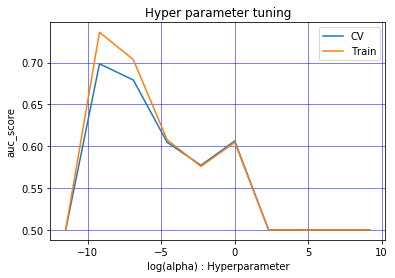

In [124]:

#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_bow_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_bow_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha: Hyperparameter')
plt.ylabel('Auc_score')
plt.title('Hyper parameter tuning for alpha')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha) : Hyperparameter')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

## Use of log for plotting 

### [Reference taken from here https://www.forbes.com/sites/naomirobbins/2012/01/19/when-should-i-use-logarithmic-scales-in-my-charts-and-graphs/#56cb46285e67](https://www.forbes.com/sites/naomirobbins/2012/01/19/when-should-i-use-logarithmic-scales-in-my-charts-and-graphs/#56cb46285e67)

- There are two main reasons to use logarithmic scales in charts and graphs. The first is to respond - to skewness towards large values; i.e., cases in which one or a few points are much larger than the - bulk of the data. The second is to show percent change or multiplicative factors

In [125]:
#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
def find_highest_alpha(k_dict):
    k=max(k_dict, key=k_dict.get)
    return k

In [126]:
print(find_highest_alpha(roc_auc_score_cv_bow_dict_l1))

0.0001


# B) training the model using best hyperparameter value

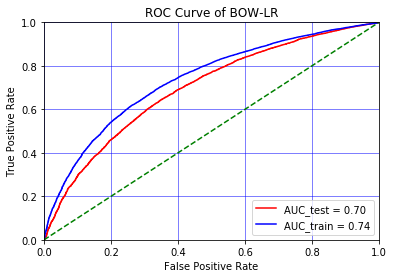

In [127]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_bow_dict_l1),random_state=3,class_weight="balanced")

# fitting the model on crossvalidation train
sgd.fit(X_tr, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')
# It is used to caliberate the probabilites we get from the model to get exact probabilities
calibrated.fit(X_cr,y_cv)

# predict the response on the crossvalidation train
pred_bow_test = calibrated.predict(X_te)
pred_bow_train = calibrated.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_bow_test_scores=calibrated.predict_proba(X_te)
pred_bow_train_scores=calibrated.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_bow_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_bow_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of BOW-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# summary

- With alpha as 0.0001 we achieve a test AUC of 0.7 with SET1

# C)  confusion matrix

##  train data

Training CM for BOW


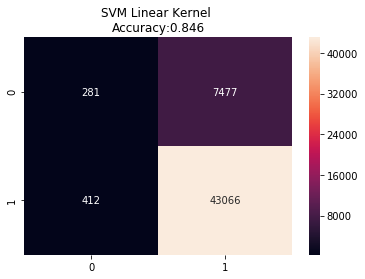

In [128]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for BOW")
cm =confusion_matrix(y_train, pred_bow_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_bow_train)))
plt.show()
print("="*50)


# Summary

- The no of true positives are significantly high appt 43k while false negatives and false positives are significantly less

Testing CM for BOW


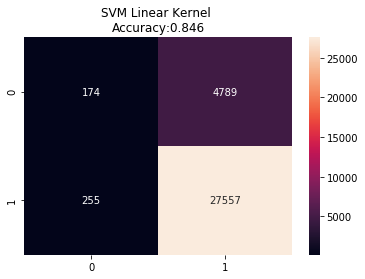

In [129]:
print("Testing CM for BOW")
cm =confusion_matrix(y_test, pred_bow_test, labels=None, sample_weight=None)
summary.append(['BoW_l1',find_highest_alpha(roc_auc_score_cv_bow_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_bow_test)))
plt.show()

# Summary

- The number of true positives areare roughly 28k while false negatives are just 255 whereas true negatives are 174

# set2 Categorical, Numerical features + Project_title(TFIDF) + Preprocessed_essay (TFIDF)

In [151]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [152]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 8465) (51236,)
(25237, 8465) (25237,)
(32775, 8465) (32775,)


# A) Simple Cross validation

In [153]:

roc_auc_score_cv_tfidf_dict_l1={}
roc_auc_score_train_tfidf_dict_l1={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=3,class_weight="balanced")
    
    # fitting the model on crossvalidation train
    sgd.fit(X_tr, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_cr,y_cv)

    # predict the response on the crossvalidation train
    pred_tfidf_cv = calibrated.predict_proba(X_cr)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_tfidf_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_tfidf_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_tfidf_train = calibrated.predict_proba(X_tr)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_tfidf_train[:,1])
    
    #insert into dict
    roc_auc_score_train_tfidf_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_tfidf_dict_l1)
print(roc_auc_score_train_tfidf_dict_l1)

100%|██████████████████████████████████████████| 10/10 [01:32<00:00,  4.51s/it]


{1e-05: 0.5, 0.0001: 0.6273017691097611, 0.001: 0.5990296091913659, 0.01: 0.6025868142914279, 0.1: 0.6088388202663123, 1: 0.6053003245634367, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.5, 0.0001: 0.6434773348908205, 0.001: 0.5968174740474068, 0.01: 0.5998539992271147, 0.1: 0.608659285430835, 1: 0.6033520080341931, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


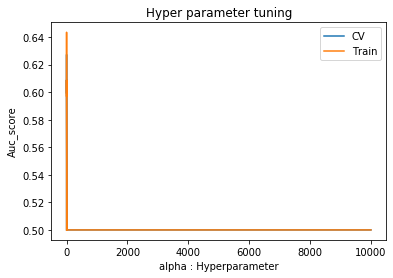

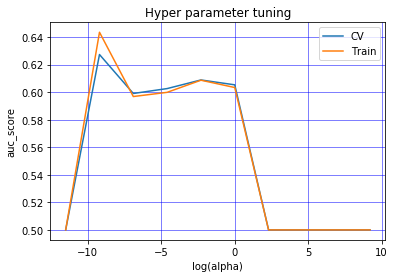

In [154]:

#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_tfidf_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_tfidf_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha : Hyperparameter')
plt.ylabel('Auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

In [155]:
print(find_highest_alpha(roc_auc_score_cv_tfidf_dict_l1))

0.0001


# Summary

- The graph is very rugged but gives best hyperparameter value at alpha = 0.0001

# B) Training model using best hyperparameter value

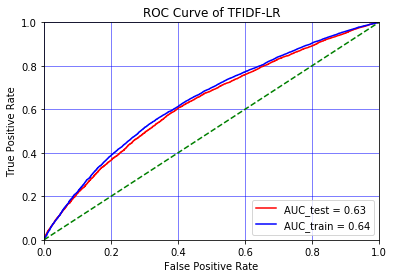

In [156]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_tfidf_dict_l1),random_state=3,class_weight="balanced")

# fitting the model on crossvalidation train
sgd.fit(X_tr, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_cr,y_cv)

# predict the response on the crossvalidation train
pred_tfidf_test = calibrated.predict(X_te)
pred_tfidf_train = calibrated.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_tfidf_test_scores=calibrated.predict_proba(X_te)
pred_tfidf_train_scores=calibrated.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_tfidf_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_tfidf_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of TFIDF-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We get Test AUC of 0.64 when alpha = 0.0001

## C) confusion matrix

## train data

Training CM for TFIDF


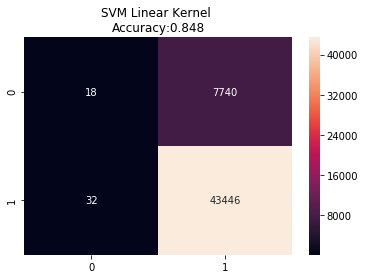

In [157]:

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for TFIDF")
cm =confusion_matrix(y_train, pred_tfidf_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_tfidf_train)))
plt.show()

# Summary

- we observe high no of true positives app 43k whereas only 32 false negatives and very few true negatives

## test data

In [158]:
print("Testing CM for TFIDF")
cm =confusion_matrix(y_test, pred_tfidf_test, labels=None, sample_weight=None)

summary.append(['Tfidf_l1',find_highest_alpha(roc_auc_score_cv_tfidf_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf_test)))
plt.show()

Testing CM for TFIDF


# Summary

- We get a large majority of pts as true positives(28k) while very very less are true negatives and false negatives

# set3 Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V

In [159]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [160]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 705) (51236,)
(25237, 705) (25237,)
(32775, 705) (32775,)


# A) Simple Cross validation

# Summary

In [161]:

roc_auc_score_cv_w2v_dict_l1={}
roc_auc_score_train_w2v_dict_l1={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=1,class_weight="balanced")
    
    # fitting the model on crossvalidation train
    sgd.fit(X_tr, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_cr,y_cv)

    # predict the response on the crossvalidation train
    pred_w2v_cv = calibrated.predict_proba(X_cr)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_w2v_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_w2v_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_w2v_train = calibrated.predict_proba(X_tr)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_w2v_train[:,1])
    
    #insert into dict
    roc_auc_score_train_w2v_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_w2v_dict_l1)
print(roc_auc_score_train_w2v_dict_l1)

 60%|█████████████████████████▊                 | 6/10 [06:44<05:01, 75.49s/it]C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

 70%|█████████████████████████████▍            | 7/10 [25:34<19:35, 391.74s/it]C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

 80%|█████████████████████████████████▌        | 8/10 [44:53<20:43, 621.98s/it]C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

100%|███████████████████████████████████████| 10/10 [1:05:22<00:00, 563.57s/it]


{1e-05: 0.5, 0.0001: 0.6562329984004993, 0.001: 0.6440501501786571, 0.01: 0.6139260287871022, 0.1: 0.631798708980716, 1: 0.6132544946302196, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.5, 0.0001: 0.6709496122534868, 0.001: 0.6483238312938515, 0.01: 0.6123494764299341, 0.1: 0.6334577063275734, 1: 0.6118887324950657, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


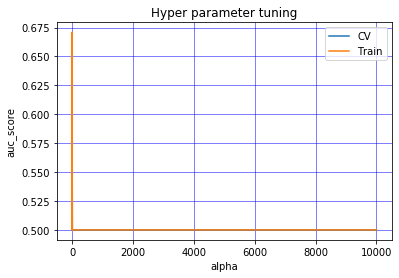

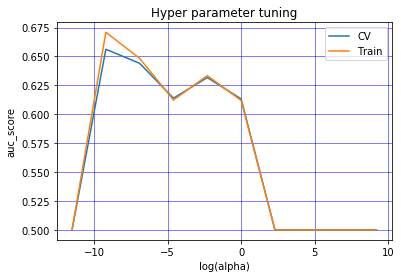

In [162]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_w2v_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_w2v_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

In [163]:
print(find_highest_alpha(roc_auc_score_cv_w2v_dict_l1))

0.0001


- We obtain best alpha as 0.0001

 # B) training model using best hyperparameter value

In [166]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_w2v_dict_l1),random_state=1,class_weight="balanced")

# fitting the model on crossvalidation train
sgd.fit(X_tr, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_cr,y_cv)

# predict the response on the crossvalidation train
pred_w2v_test = calibrated.predict(X_te)
pred_w2v_train = calibrated.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_w2v_test_scores=calibrated.predict_proba(X_te)
pred_w2v_train_scores=calibrated.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_w2v_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_w2v_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of W2V-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We get Test AUC of 0.65 with alpha as 0.0001

# confusion matrix

## train data

Training CM for W2V


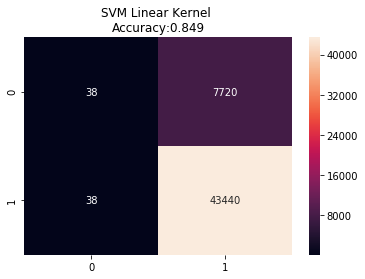

In [167]:

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for W2V")
cm =confusion_matrix(y_train, pred_w2v_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_w2v_train)))
plt.show()
print("="*50)

# Summary

- We get avast majority as true positives app 43k while very few true negatives

## test data

Testing CM for W2V


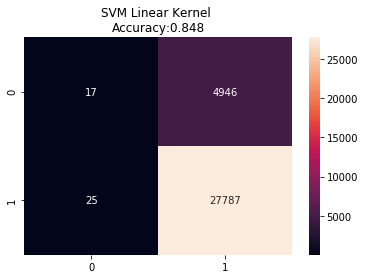

In [168]:
print("Testing CM for W2V")
cm =confusion_matrix(y_test, pred_w2v_test, labels=None, sample_weight=None)
summary.append(['W2v_l1',find_highest_alpha(roc_auc_score_cv_w2v_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_w2v_test)))
plt.show()

# Summary

- For test data we get app 28k true positives while small no of true negatives again

# set4 Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [169]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [170]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 705) (51236,)
(25237, 705) (25237,)
(32775, 705) (32775,)


# A) Simple cross validation

In [171]:
roc_auc_score_cv_tfidf_w2v_dict_l1={}
roc_auc_score_train_tfidf_w2v_dict_l1={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=1,class_weight="balanced")
    
    # fitting the model on crossvalidation train
    sgd.fit(X_tr, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_cr,y_cv)

    # predict the response on the crossvalidation train
    pred_tfidf_w2v_cv = calibrated.predict_proba(X_cr)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_tfidf_w2v_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_tfidf_w2v_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_tfidf_w2v_train = calibrated.predict_proba(X_tr)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_tfidf_w2v_train[:,1])
    
    #insert into dict
    roc_auc_score_train_tfidf_w2v_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_tfidf_w2v_dict_l1)
print(roc_auc_score_train_tfidf_w2v_dict_l1)

 60%|█████████████████████████▊                 | 6/10 [06:59<04:58, 74.64s/it]C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

 70%|█████████████████████████████▍            | 7/10 [23:11<17:11, 343.93s/it]C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

 80%|█████████████████████████████████▌        | 8/10 [40:54<18:39, 559.65s/it]C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

100%|█████████████████████████████████████████| 10/10 [59:27<00:00, 508.77s/it]


{1e-05: 0.678116925691407, 0.0001: 0.6696039849965054, 0.001: 0.6629512117579188, 0.01: 0.6198931533333718, 0.1: 0.631798708980716, 1: 0.6132544946302196, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.6911782084252701, 0.0001: 0.6834742724749208, 0.001: 0.6678801744633103, 0.01: 0.6178037065644411, 0.1: 0.6334577063275734, 1: 0.6118887324950657, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


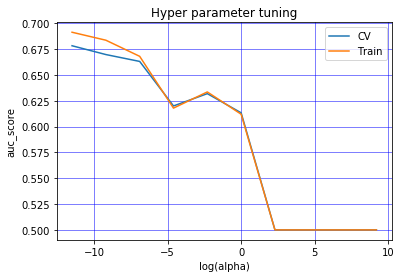

In [172]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_tfidf_w2v_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_tfidf_w2v_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

In [173]:

print(find_highest_alpha(roc_auc_score_cv_tfidf_w2v_dict_l1))

1e-05


# Summary

- We get best alpha as 0.00001

# B) training the model using best hyperparameter value

In [174]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_tfidf_w2v_dict_l1),random_state=1,class_weight="balanced")

# fitting the model on crossvalidation train
sgd.fit(X_tr, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_cr,y_cv)

# predict the response on the crossvalidation train
pred_tfidf_w2v_test = calibrated.predict(X_te)
pred_tfidf_w2v_train = calibrated.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_tfidf_w2v_test_scores=calibrated.predict_proba(X_te)
pred_tfidf_w2v_train_scores=calibrated.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_tfidf_w2v_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_tfidf_w2v_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of TFIDF_W2V-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

- We obtain a test AUC of 0.68

# C) Confusion matrix

## train data

Training CM for TFIDF_W2V


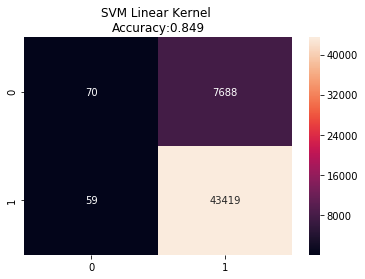

In [175]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for TFIDF_W2V")
cm =confusion_matrix(y_train, pred_tfidf_w2v_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_tfidf_w2v_train)))
plt.show()
print("="*50)

# Summary

- We obtain a large no of true positives 43k while false positives are lesser than true postives.

## test data

In [194]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Test CM for TFIDF_W2V")
cm =confusion_matrix(y_test, pred_tfidf_w2v_test, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf_w2v_test)))
plt.show()
print("="*50)

Test CM for TFIDF_W2V


# Summary

- we observe nearly 27760 as true positives
- nearly 50 are false negatives for test data

# Preparing set 5


#Lets Prepare SET 5
- Lets apply TruncatedSVD
- Consider these set of features

    - school_state : categorical data
    
    - clean_categories : categorical data
    - clean_subcategories : categorical data
    - project_grade_category :categorical data
    - teacher_prefix : categorical data
    - quantity : numerical data
    - teacher_number_of_previously_posted_projects : numerical data
    - price : numerical data
    - sentiment score's of each of the essay : numerical data
    - number of words in the title : numerical data
    - number of words in the combine essays : numerical data
    - Apply TruncatedSVD on TfidfVectorizer of essay text, choose the number of components (`n_components`) using elbow method :     -numerical data

In [178]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['clean_essays'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf=vectorizer.transform(X_train['clean_essays'].values)
X_test_essay_tfidf=vectorizer.transform(X_test['clean_essays'].values)
X_cv_essay_tfidf=vectorizer.transform(X_cv['clean_essays'].values)


print("Shape of matrix after one hot encoding ",X_train_essay_tfidf.shape)

Shape of matrix after one hot encoding  (51236, 5000)


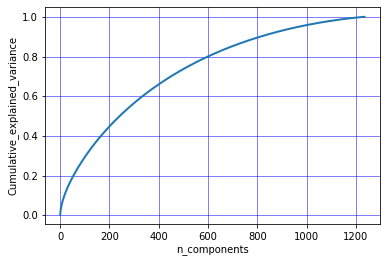

In [179]:

# initializing the pca
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()

svd.n_components =int(X_train_essay_tfidf.shape[1]-1)
#choosing only 50000 Data points to avoid memory error. 
svd_data = svd.fit_transform(X_train_essay_tfidf[50000:])

percentage_var_explained = svd.explained_variance_ / np.sum(svd.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

## Note We observe that 90% variance can be maintained by selecting around 800 features from the given graph

In [180]:

svd = TruncatedSVD(n_components= 800)
svd.fit(X_train_essay_tfidf)

X_train_svd=svd.transform(X_train_essay_tfidf)
X_test_svd=svd.transform(X_test_essay_tfidf)
X_cv_svd=svd.transform(X_cv_essay_tfidf)

In [181]:
print(X_train_svd.shape)
print(X_test_svd.shape)
print(X_cv_svd.shape)

(51236, 800)
(32775, 800)
(25237, 800)


In [195]:
X_train_essay_sentiment_score=X_train['pos'][:,np.newaxis]
X_test_essay_sentiment_score=X_test['pos'][:,np.newaxis]
X_cv_essay_sentiment_score=X_cv['pos'][:,np.newaxis]

X_train_essay_sentiment_score_n=X_train['neg'][:,np.newaxis]
X_test_essay_sentiment_score_n=X_test['neg'][:,np.newaxis]
X_cv_essay_sentiment_score_n=X_cv['neg'][:,np.newaxis]

X_train_essay_sentiment_score_neu=X_train['neu'][:,np.newaxis]
X_test_essay_sentiment_score_neu=X_test['neu'][:,np.newaxis]
X_cv_essay_sentiment_score_neu=X_cv['neu'][:,np.newaxis]

X_train_essay_sentiment_score_comp=X_train['compound'][:,np.newaxis]
X_test_essay_sentiment_score_comp=X_test['compound'][:,np.newaxis]
X_cv_essay_sentiment_score_comp=X_cv['compound'][:,np.newaxis]


In [196]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train,X_train_essay_sentiment_score ,X_train_essay_sentiment_score_n,X_train_essay_sentiment_score_neu,X_train_essay_sentiment_score_comp, X_train_svd)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test,X_test_essay_sentiment_score,X_test_essay_sentiment_score_n,X_test_essay_sentiment_score_neu,X_test_essay_sentiment_score_comp , X_test_svd )).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv,X_cv_essay_sentiment_score ,X_cv_essay_sentiment_score_n,X_cv_essay_sentiment_score_neu,X_cv_essay_sentiment_score_comp, X_cv_svd )).tocsr()

In [197]:
print(X_tr.shape)
print(X_te.shape)
print(X_cr.shape)

(51236, 909)
(32775, 909)
(25237, 909)


# A  Simple Cross validation

In [198]:
#store the results 
roc_auc_score_cv_svd_dict_l1={}
roc_auc_score_train_svd_dict_l1={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=3,class_weight="balanced")
    
    # fitting the model on crossvalidation train
    sgd.fit(X_tr, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_cr,y_cv)

    # predict the response on the crossvalidation train
    pred_svd_cv = calibrated.predict_proba(X_cr)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_svd_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_svd_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_svd_train = calibrated.predict_proba(X_tr)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_svd_train[:,1])
    
    #insert into dict
    roc_auc_score_train_svd_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_svd_dict_l1)
print(roc_auc_score_train_svd_dict_l1)

100%|██████████████████████████████████████████| 10/10 [08:59<00:00, 28.16s/it]


{1e-05: 0.5, 0.0001: 0.6388080239386432, 0.001: 0.6236869327117691, 0.01: 0.5892129620170152, 0.1: 0.6088388202663123, 1: 0.6053003245634367, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.5, 0.0001: 0.6487792017110442, 0.001: 0.6318955320924502, 0.01: 0.5906834012800932, 0.1: 0.608659285430835, 1: 0.6033520080341931, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


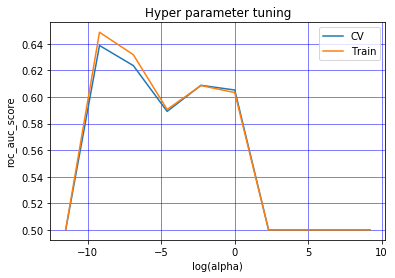

In [199]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_svd_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_svd_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('roc_auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('roc_auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

In [200]:
print(find_highest_alpha(roc_auc_score_cv_svd_dict_l1))

0.0001


# B Training the model

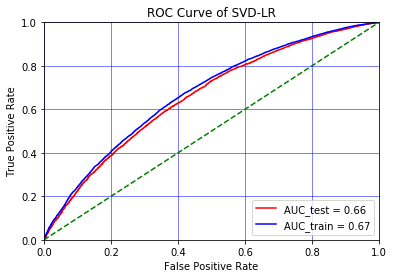

In [207]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_svd_dict_l1),random_state=3)

# fitting the model on crossvalidation train
sgd.fit(X_train_svd, y_train)

# predict the response on the crossvalidation train
pred_svd_test = sgd.predict(X_test_svd)
pred_svd_train = sgd.predict(X_train_svd)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_svd_test_scores=sgd.decision_function(X_test_svd)
pred_svd_train_scores=sgd.decision_function(X_train_svd)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_svd_test_scores)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_svd_train_scores)
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVD-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We obtain a test AUC of 0.66 in set 5

# C) Confusion Matrix

## train data

In [ ]:

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for SVD")
cm =confusion_matrix(y_train, pred_svd_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_svd_train)))
plt.show()


# test data

In [191]:
print("="*50)	
print("Testing CM for SVD")
cm =confusion_matrix(y_test, pred_svd_test, labels=None, sample_weight=None)
summary.append(['Svd_l1',find_highest_alpha(roc_auc_score_cv_svd_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_svd_test)))
plt.show()

Testing CM for SVD


# Set1 using L2 regulizer using BOW

In [211]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()

In [212]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 14659) (51236,)
(25237, 14659) (25237,)
(32775, 14659) (32775,)


# A) Simple Cross validation

In [213]:
#store the results 
summary=[]
roc_auc_score_cv_bow_dict_l2={}
roc_auc_score_train_bow_dict_l2={}




alpha=[10**-5,10**-4,10**-3,0.01,0.1,1,10,100,1000,10**4]
for i in tqdm(alpha):
    # create instance of model
    
    sgd=SGDClassifier(loss='hinge',penalty='l2', alpha=i,random_state=3,class_weight="balanced")
    
    # fitting the model on crossvalidation train
    sgd.fit(X_tr, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_cr,y_cv)

    # predict the response on the crossvalidation train
    pred_bow_cv = calibrated.predict_proba(X_cr)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_bow_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_bow_dict_l2[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_bow_train = calibrated.predict_proba(X_tr)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_bow_train[:,1])
    
    #insert into dict
    roc_auc_score_train_bow_dict_l2[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_bow_dict_l2)
print(roc_auc_score_train_bow_dict_l2)




100%|██████████████████████████████████████████| 10/10 [00:48<00:00,  2.93s/it]


{1e-05: 0.7063264622878677, 0.0001: 0.6672276104851617, 0.001: 0.720409456929379, 0.01: 0.6157645234048081, 0.1: 0.677411486098539, 1: 0.6713294289065882, 10: 0.6380923986615461, 100: 0.6275448812897914, 1000: 0.6180196228948078, 10000: 0.6022818792241567}
{1e-05: 0.7389806807260539, 0.0001: 0.6870327996909977, 0.001: 0.761396354921053, 0.01: 0.617192302535099, 0.1: 0.6904257736451291, 1: 0.677675888174432, 10: 0.6413499006902781, 100: 0.628820440620504, 1000: 0.6180709890394944, 10000: 0.5995035658277884}


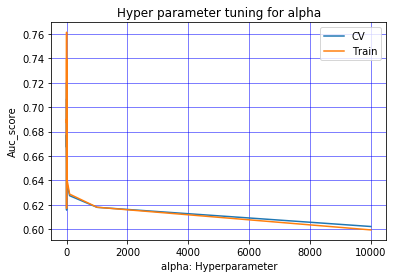

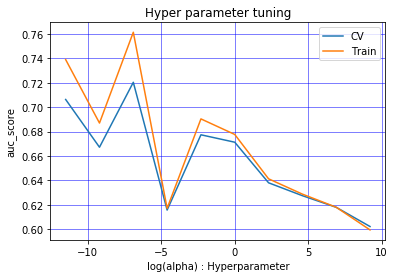

In [214]:

#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_bow_dict_l2.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_bow_dict_l2.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha: Hyperparameter')
plt.ylabel('Auc_score')
plt.title('Hyper parameter tuning for alpha')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha) : Hyperparameter')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

In [215]:
print(find_highest_alpha(roc_auc_score_cv_bow_dict_l2))

0.001


- The graph has many peaks,not at all smooth,we get best alpha to be 0.001

# B) Training model with best alpha

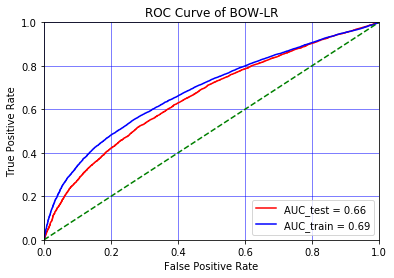

In [216]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l2',alpha=find_highest_alpha(roc_auc_score_cv_bow_dict_l2),random_state=3,class_weight="balanced")

# fitting the model on crossvalidation train
sgd.fit(X_tr, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')
# It is used to caliberate the probabilites we get from the model to get exact probabilities
calibrated.fit(X_cr,y_cv)

# predict the response on the crossvalidation train
pred_bow_test = calibrated.predict(X_te)
pred_bow_train = calibrated.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_bow_test_scores=calibrated.predict_proba(X_te)
pred_bow_train_scores=calibrated.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_bow_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_bow_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of BOW-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# Summary

## We get a test AUC of 0.66

# C) confusion matrix

## train data

In [249]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for BOW")
cm =confusion_matrix(y_train, pred_bow_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_bow_train)))
plt.show()
print("="*50)

Training CM for BOW


# Summary

- we get about 43k true positives and 8k false positives remaining things are very low

## test

Testing CM for BOW


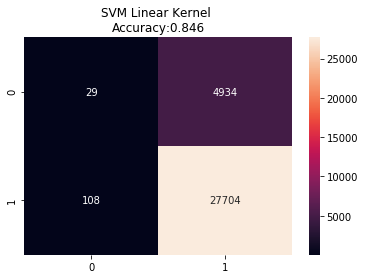

In [250]:
print("Testing CM for BOW")
cm =confusion_matrix(y_test, pred_bow_test, labels=None, sample_weight=None)
summary.append(['BoW_l1',find_highest_alpha(roc_auc_score_cv_bow_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_bow_test)))
plt.show()

# Summary

- We observe roughly 28k true positives while while fale positives are roughly 8k whereas other things are very small

# set2 with L2 TFIDF

In [219]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [220]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 8465) (51236,)
(25237, 8465) (25237,)
(32775, 8465) (32775,)


# A) Simple Cross Validation

In [221]:
roc_auc_score_cv_tfidf_dict_l2={}
roc_auc_score_train_tfidf_dict_l2={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l2', alpha=i,random_state=3,class_weight="balanced")
    
    # fitting the model on crossvalidation train
    sgd.fit(X_tr, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_cr,y_cv)

    # predict the response on the crossvalidation train
    pred_tfidf_cv = calibrated.predict_proba(X_cr)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_tfidf_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_tfidf_dict_l2[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_tfidf_train = calibrated.predict_proba(X_tr)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_tfidf_train[:,1])
    
    #insert into dict
    roc_auc_score_train_tfidf_dict_l2[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_tfidf_dict_l2)
print(roc_auc_score_train_tfidf_dict_l2)

100%|██████████████████████████████████████████| 10/10 [00:47<00:00,  2.87s/it]


{1e-05: 0.5, 0.0001: 0.5, 0.001: 0.604331370871138, 0.01: 0.643832566366179, 0.1: 0.5928640257226228, 1: 0.6271728685731693, 10: 0.6285286705197678, 100: 0.6285050851921585, 1000: 0.6177341793288511, 10000: 0.6022208751021746}
{1e-05: 0.5, 0.0001: 0.5, 0.001: 0.6021606954596613, 0.01: 0.6492024940806516, 0.1: 0.596625462325602, 1: 0.6276417057832071, 10: 0.630834215657524, 100: 0.6304989466956652, 1000: 0.6177167578602275, 10000: 0.5994312657033456}


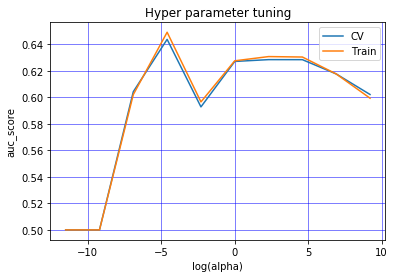

In [222]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_tfidf_dict_l2.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_tfidf_dict_l2.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha : Hyperparameter')
plt.ylabel('Auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

In [223]:
print(find_highest_alpha(roc_auc_score_cv_tfidf_dict_l2))

0.01


# Summary 
 - we see best alpha as 0.01 from the plot

# B) Training model using best Alpha

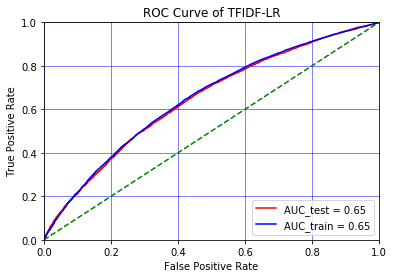

In [224]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l2',alpha=find_highest_alpha(roc_auc_score_cv_tfidf_dict_l2),random_state=3,class_weight="balanced")

# fitting the model on crossvalidation train
sgd.fit(X_tr, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_cr,y_cv)

# predict the response on the crossvalidation train
pred_tfidf_test = calibrated.predict(X_te)
pred_tfidf_train = calibrated.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_tfidf_test_scores=calibrated.predict_proba(X_te)
pred_tfidf_train_scores=calibrated.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_tfidf_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_tfidf_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of TFIDF-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We observe a test AUC of 0.65 for the best alpha

# C) confusion Matrix

# train data

Training CM for TFIDF


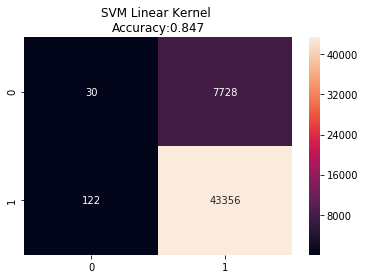

In [225]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for TFIDF")
cm =confusion_matrix(y_train, pred_tfidf_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_tfidf_train)))
plt.show()

# summary 

- we see roughly 43k true positives for training data while very few true negatives

# test data

In [226]:
print("Testing CM for TFIDF")
cm =confusion_matrix(y_test, pred_tfidf_test, labels=None, sample_weight=None)

summary.append(['Tfidf_l1',find_highest_alpha(roc_auc_score_cv_tfidf_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf_test)))
plt.show()

Testing CM for TFIDF


# summary 

- We observe about 28k true positives which are a majority and again very few true negatives(22)

# set3 L2 reg with avg_w2v

In [227]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [228]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 705) (51236,)
(25237, 705) (25237,)
(32775, 705) (32775,)


# A) Simple cross validation

In [229]:
roc_auc_score_cv_w2v_dict_l2={}
roc_auc_score_train_w2v_dict_l2={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l2', alpha=i,random_state=1,class_weight="balanced")
    
    # fitting the model on crossvalidation train
    sgd.fit(X_tr, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_cr,y_cv)

    # predict the response on the crossvalidation train
    pred_w2v_cv = calibrated.predict_proba(X_cr)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_w2v_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_w2v_dict_l2[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_w2v_train = calibrated.predict_proba(X_tr)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_w2v_train[:,1])
    
    #insert into dict
    roc_auc_score_train_w2v_dict_l2[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_w2v_dict_l2)
print(roc_auc_score_train_w2v_dict_l2)

100%|██████████████████████████████████████████| 10/10 [01:51<00:00,  6.52s/it]


{1e-05: 0.5, 0.0001: 0.5, 0.001: 0.5098965501093626, 0.01: 0.5007929069412426, 0.1: 0.6400601848679079, 1: 0.6404563572698583, 10: 0.629019966336283, 100: 0.6281263512681867, 1000: 0.6178454458614324, 10000: 0.6021841284285367}
{1e-05: 0.5, 0.0001: 0.5, 0.001: 0.5053773213848358, 0.01: 0.4964177270240213, 0.1: 0.6398461517863719, 1: 0.6423212666628411, 10: 0.6309439629001785, 100: 0.6299287134469906, 1000: 0.6178951645764528, 10000: 0.599396383050121}


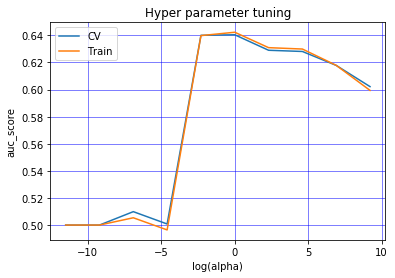

In [230]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_w2v_dict_l2.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_w2v_dict_l2.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

In [231]:
print(find_highest_alpha(roc_auc_score_cv_w2v_dict_l2))

1


# Summary
- The best alpha obtained is at 1

# B) Training model with best alpha

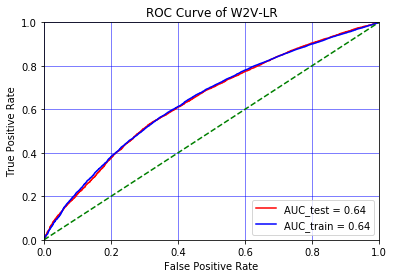

In [233]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l2',alpha=find_highest_alpha(roc_auc_score_cv_w2v_dict_l2),random_state=1,class_weight="balanced")

# fitting the model on crossvalidation train
sgd.fit(X_tr, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_cr,y_cv)

# predict the response on the crossvalidation train
pred_w2v_test = calibrated.predict(X_te)
pred_w2v_train = calibrated.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_w2v_test_scores=calibrated.predict_proba(X_te)
pred_w2v_train_scores=calibrated.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_w2v_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_w2v_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of W2V-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- at alpha =1 we obtain test AUC of 0.64

# C) confusion matrix

## train data

In [234]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for W2V")
cm =confusion_matrix(y_train, pred_w2v_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_w2v_train)))
plt.show()
print("="*50)

Training CM for W2V


# summary 

- again we obtain true positives about 44k and false positives as 7730,other things are low

# test data

In [235]:
print("Testing CM for W2V")
cm =confusion_matrix(y_test, pred_w2v_test, labels=None, sample_weight=None)
summary.append(['W2v_l1',find_highest_alpha(roc_auc_score_cv_w2v_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_w2v_test)))
plt.show()

Testing CM for W2V


# Summary
- We observe 28k true positives for test data while only true negatives as 20

# set4 with L2 TFIDF_weighted_w2v

In [236]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [237]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 705) (51236,)
(25237, 705) (25237,)
(32775, 705) (32775,)


# A) Simple cross validation

In [240]:
roc_auc_score_cv_tfidf_w2v_dict_l2={}
roc_auc_score_train_tfidf_w2v_dict_l2={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l2', alpha=i,random_state=1,class_weight="balanced")
    
    # fitting the model on crossvalidation train
    sgd.fit(X_tr, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_cr,y_cv)

    # predict the response on the crossvalidation train
    pred_tfidf_w2v_cv = calibrated.predict_proba(X_cr)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_tfidf_w2v_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_tfidf_w2v_dict_l2[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_tfidf_w2v_train = calibrated.predict_proba(X_tr)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_tfidf_w2v_train[:,1])
    
    #insert into dict
    roc_auc_score_train_tfidf_w2v_dict_l2[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_tfidf_w2v_dict_l2)
print(roc_auc_score_train_tfidf_w2v_dict_l2)

100%|██████████████████████████████████████████| 10/10 [01:57<00:00,  6.90s/it]


{1e-05: 0.5, 0.0001: 0.5, 0.001: 0.5175378418638246, 0.01: 0.5094331411931605, 0.1: 0.6156682634951823, 1: 0.6426138159476311, 10: 0.6293924312068542, 100: 0.6281137398391231, 1000: 0.6178530835970573, 10000: 0.6021852771439747}
{1e-05: 0.5, 0.0001: 0.5, 0.001: 0.5218673619337411, 0.01: 0.5133028612041226, 0.1: 0.614877542320165, 1: 0.6440062772885016, 10: 0.6312319686240881, 100: 0.6298949573795407, 1000: 0.6179038689339122, 10000: 0.5993973110010353}


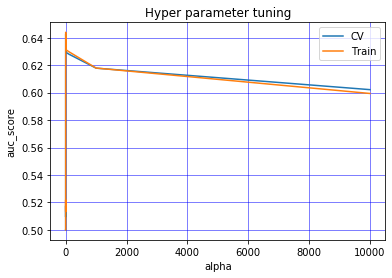

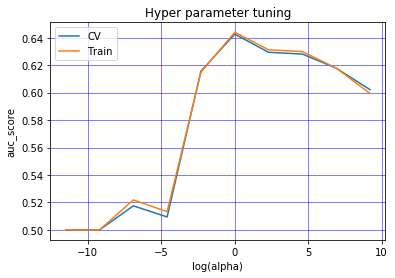

In [241]:
import math

lists1 = sorted(roc_auc_score_cv_tfidf_w2v_dict_l2.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_tfidf_w2v_dict_l2.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

In [242]:

print(find_highest_alpha(roc_auc_score_cv_tfidf_w2v_dict_l2))

1


# summary
- we get best alpha as 1 from the plot

# B) Training model with the best alpha

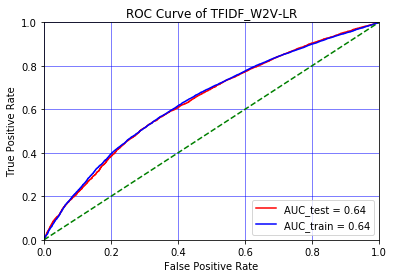

In [243]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l2',alpha=find_highest_alpha(roc_auc_score_cv_tfidf_w2v_dict_l2),random_state=1,class_weight="balanced")

# fitting the model on crossvalidation train
sgd.fit(X_tr, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_cr,y_cv)

# predict the response on the crossvalidation train
pred_tfidf_w2v_test = calibrated.predict(X_te)
pred_tfidf_w2v_train = calibrated.predict(X_tr)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_tfidf_w2v_test_scores=calibrated.predict_proba(X_te)
pred_tfidf_w2v_train_scores=calibrated.predict_proba(X_tr)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_tfidf_w2v_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_tfidf_w2v_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of TFIDF_W2V-LR')
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.show()

# summary

- with best alpha as 1 we get test AUC of 0.64 with l2 regulizer

# C) confusion matrix

## train data

Training CM for TFIDF_W2V


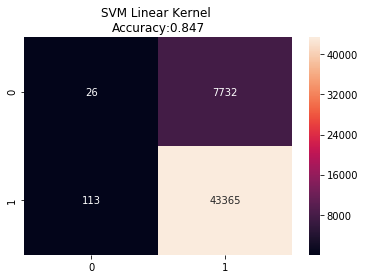

In [244]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for TFIDF_W2V")
cm =confusion_matrix(y_train, pred_tfidf_w2v_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_tfidf_w2v_train)))
plt.show()
print("="*50)

# Summary
- we obtain 43k true positives while the number of false negatives are only 113

## test data

Test CM for TFIDF_W2V


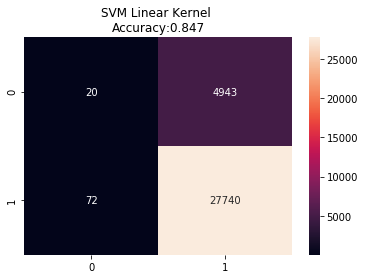

In [245]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Test CM for TFIDF_W2V")
cm =confusion_matrix(y_test, pred_tfidf_w2v_test, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf_w2v_test)))
plt.show()
print("="*50)

# Summary

- We observe a large number of true positives(28k) and very less false negatives(72)

In [246]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", "AUC"]

x.add_row(["BOW_L1", "Linear svm(using sgd classifier with hinge loss(L1))", 10**-4, 0.70])
x.add_row(["TFIDF_L1", "Linear svm(using sgd classifier with hinge loss(L1))", 10**-4, 0.63])
x.add_row(["AVG_W2V_L1", "Linear svm(using sgd classifier with hinge loss(L1))", 10**-4, 0.65])
x.add_row(["TFIDF_W2V_L1", "Linear svm(using sgd classifier with hinge loss(L1))", 10**-5, 0.68])
x.add_row(["SVD_L1", "Linear svm( sgd classifier with hinge loss(L1))", 10**-4, 0.65])
x.add_row(["BOW_L2", "Linear svm( sgd classifier with hinge loss(L2))", 10**-3, 0.66])
x.add_row(["TFIDF_L2", "Linear svm( sgd classifier with hinge loss(L2))", 10**-2, 0.65])
x.add_row(["AVG_W2V_L2", "Linear svm( sgd classifier with hinge loss(L2))", 1, 0.64])
x.add_row(["TFIDF_W2V_L2", "Linear svm( sgd classifier with hinge loss(L2))", 1, 0.64])



print(x)

+--------------+------------------------------------------------------+-----------------------+------+
|  Vectorizer  |                        Model                         | Alpha:Hyper Parameter | AUC  |
+--------------+------------------------------------------------------+-----------------------+------+
|    BOW_L1    | Linear svm(using sgd classifier with hinge loss(L1)) |         0.0001        | 0.7  |
|   TFIDF_L1   | Linear svm(using sgd classifier with hinge loss(L1)) |         0.0001        | 0.63 |
|  AVG_W2V_L1  | Linear svm(using sgd classifier with hinge loss(L1)) |         0.0001        | 0.65 |
| TFIDF_W2V_L1 | Linear svm(using sgd classifier with hinge loss(L1)) |         1e-05         | 0.68 |
|    SVD_L1    |   Linear svm( sgd classifier with hinge loss(L1))    |         0.0001        | 0.65 |
|    BOW_L2    |   Linear svm( sgd classifier with hinge loss(L2))    |         0.001         | 0.66 |
|   TFIDF_L2   |   Linear svm( sgd classifier with hinge loss(L2))    |  

# Conclusions for L1 regulizer

- We observe that BOW with L1 regulizer has best performance with AUC of 0.7

- The worst performance is by TFIDF model with L1 reg

- We also see that by reducing dimensionality using svd set 2 actually performs better than when dimensionality was not reduced which is interesting

- The TFIDF W2v model performs second best with AUC of 0.68

- 

# Conclusions for L2 regulizer

- We observe that again BOW performs best out of the given models

- Here the performance of all remaining models are quite similar

- One thing to note is TFIDF with L2 reg performed better than L1 reg

- Also AVG_W2V performed better with L1 reg than L2 reg